In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier #KNN

In [2]:
data=pd.read_csv("C:/Users/abcdr/OneDrive/Desktop/UCI_Credit_Card.csv")

In [4]:
data.head()
data.drop('ID', axis = 1, inplace =True)

SEX: Gender
              1 = male 
              2 = female
              
              
EDUCATION:
               1 = graduate school 
               2 = university 
               3 = high school 
               4 = others 
               5 = unknown 
               6 = unknown
               
               
               
PAY_0,2,3,4,5,6: 
                Repayment status in September 2005, August 2005, July 2005, June 2005, May 2005, April 2005 (respectivey)
              -2= no consumption
              -1= pay duly
              1 = payment delay for one month
              2 = payment delay for two months
              ... 
              8 = payment delay for eight months
              9 = payment delay for nine months and above

In [5]:
data.rename(columns={'default.payment.next.month':'Default'},inplace=True)

In [6]:
data['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [7]:
data['EDUCATION']=np.where(data['EDUCATION'] == 5, 4, data['EDUCATION'])
data['EDUCATION']=np.where(data['EDUCATION'] == 6, 4, data['EDUCATION'])
data['EDUCATION']=np.where(data['EDUCATION'] == 0, 4, data['EDUCATION'])

In [8]:
data['EDUCATION'].unique()

array([2, 1, 3, 4], dtype=int64)

In [9]:
data['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

0    23364
1     6636
Name: Default, dtype: int64

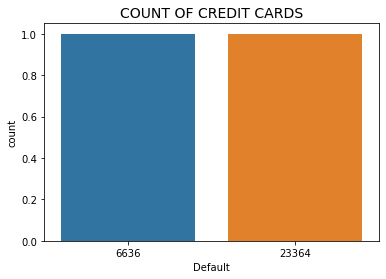

In [10]:
sns.countplot(data['Default'].value_counts())
plt.title('COUNT OF CREDIT CARDS', size=14)
data['Default'].value_counts()

In [11]:
print("SUMMARY STATISTICS OF NUMERIC COLUMNS")
print(data.describe().T)

SUMMARY STATISTICS OF NUMERIC COLUMNS
             count           mean            std       min       25%  \
LIMIT_BAL  30000.0  167484.322667  129747.661567   10000.0  50000.00   
SEX        30000.0       1.603733       0.489129       1.0      1.00   
EDUCATION  30000.0       1.842267       0.744494       1.0      1.00   
MARRIAGE   30000.0       1.551867       0.521970       0.0      1.00   
AGE        30000.0      35.485500       9.217904      21.0     28.00   
PAY_0      30000.0      -0.016700       1.123802      -2.0     -1.00   
PAY_2      30000.0      -0.133767       1.197186      -2.0     -1.00   
PAY_3      30000.0      -0.166200       1.196868      -2.0     -1.00   
PAY_4      30000.0      -0.220667       1.169139      -2.0     -1.00   
PAY_5      30000.0      -0.266200       1.133187      -2.0     -1.00   
PAY_6      30000.0      -0.291100       1.149988      -2.0     -1.00   
BILL_AMT1  30000.0   51223.330900   73635.860576 -165580.0   3558.75   
BILL_AMT2  30000.0   49179

In [12]:
pay=['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000290DF0B1E50>,
      dtype=object)

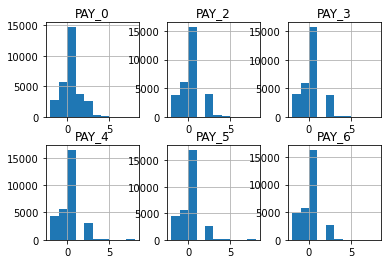

In [13]:
data[pay].hist(layout=(2,3))

In [14]:
pay_amt=['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000290E042D2E0>,
      dtype=object)

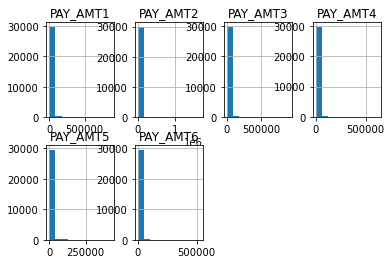

In [15]:
data[pay_amt].hist(layout=(2,4))

In [16]:
corr = data.corr()


Text(0.5, 1.0, 'CORRELATION MATRIX - HEATMAP')

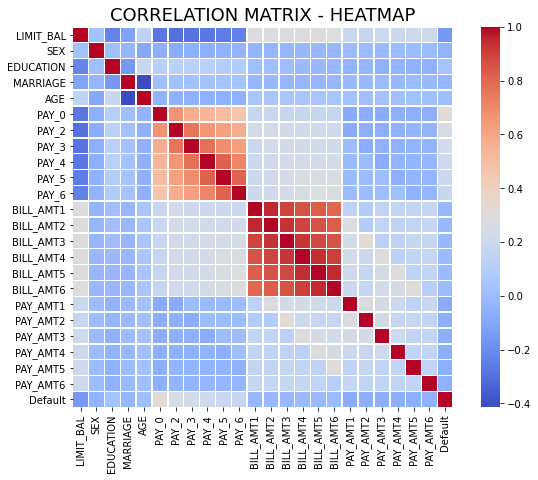

In [17]:
f,ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5,ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18)

In [18]:
X = data.drop('Default', axis=1)  
Y= data['Default']
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=101)

In [20]:
num_features=4
model = LogisticRegression()
rfe_stand = RFE(model,num_features)
fit_stand = rfe_stand.fit(X,Y)
print("Std Model Feature Ranking:", fit_stand.ranking_)
score_stand = rfe_stand.score(X,Y)
print("Standardized Model Score with selected features is: %f" % (score_stand.mean()))

Std Model Feature Ranking: [16  1  4  1  6  1  2  1  5  3  7 11 10 14 20 15 19  8  9 12 17 13 18]
Standardized Model Score with selected features is: 0.808400


In [21]:
print("St Model Num Features:", fit_stand.n_features_)
print("St Model Selected Features:", fit_stand.support_)

St Model Num Features: 4
St Model Selected Features: [False  True False  True False  True False  True False False False False
 False False False False False False False False False False False]


In [21]:
feature_names = np.array(X.columns)
print('Most important features (RFE): %s'% feature_names[rfe_stand.support_])

Most important features (RFE): ['SEX' 'MARRIAGE' 'PAY_0' 'PAY_3']


In [22]:
X_new=data[['SEX','MARRIAGE','PAY_0','PAY_3']]

In [24]:
X_new_train,X_new_test,Y_train,Y_test=train_test_split(X_new,Y,test_size=0.35,random_state=101)

In [28]:
glm=LogisticRegression()

In [29]:
glm.fit(X_new_train,Y_train)

LogisticRegression()

In [30]:
y_pred=glm.predict(X_new_test)

In [31]:
from sklearn.metrics import classification_report

In [32]:
report=classification_report(Y_test,y_pred)

In [33]:
print(report)

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      8218
           1       0.73      0.22      0.34      2282

    accuracy                           0.81     10500
   macro avg       0.77      0.60      0.61     10500
weighted avg       0.80      0.81      0.77     10500



In [34]:
from sklearn.model_selection import cross_val_score,ShuffleSplit

In [35]:
cv=ShuffleSplit(n_splits=7,test_size=0.35,random_state=101)

In [37]:
cross_val_score(glm,X_new,Y,cv=cv).mean()

0.8111428571428572

In [38]:
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}

In [40]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [41]:
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, random_state=0)

In [45]:
tree_cv.fit(X_new_train,Y_train)
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))

Tuned Decision Tree Parameters: {'min_samples_leaf': 8, 'max_features': 4, 'max_depth': 4, 'criterion': 'gini'}


In [51]:
Tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 7, 
                                     max_features= 4, min_samples_leaf= 2, 
                                     random_state=0)

In [52]:
Tree.fit(X_new_train,Y_train)

DecisionTreeClassifier(max_depth=7, max_features=4, min_samples_leaf=2,
                       random_state=0)

In [53]:
y_pred_tree=Tree.predict(X_new_test)

In [54]:
report_tree=classification_report(Y_test,y_pred_tree)

In [55]:
print(report_tree)

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      8218
           1       0.70      0.34      0.46      2282

    accuracy                           0.82     10500
   macro avg       0.77      0.65      0.68     10500
weighted avg       0.81      0.82      0.80     10500



In [56]:
cv=ShuffleSplit(n_splits=7,test_size=0.35,random_state=101)

In [58]:
cross_val_score(Tree,X_new,Y,cv=cv).mean()

0.8209115646258505

In [59]:
param_dist={'n_estimators': [50,100,150,200,250],
               "max_features": [1,2,3,4,5,6,7,8,9],
               'max_depth': [1,2,3,4,5,6,7,8,9],
               "criterion": ["gini", "entropy"]}
    

In [60]:
rf=RandomForestClassifier()

In [61]:
rf_cv=RandomizedSearchCV(rf,param_distributions=param_dist,cv=5)

In [64]:
rf_cv.fit(X_new,Y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9],
                                        'n_estimators': [50, 100, 150, 200,
                                                         250]})

In [65]:
print("Tuned Random Forest Parameters: %s" % (rf_cv.best_params_))

Tuned Random Forest Parameters: {'n_estimators': 250, 'max_features': 4, 'max_depth': 1, 'criterion': 'gini'}


In [66]:
Ran = RandomForestClassifier(criterion= 'gini', max_depth= 1, 
                                     max_features= 4, n_estimators= 250, 
                                     random_state=0)

In [67]:
Ran.fit(X_new_train,Y_train)

RandomForestClassifier(max_depth=1, max_features=4, n_estimators=250,
                       random_state=0)

In [68]:
y_pred_forest=Ran.predict(X_new_test)

In [69]:
report_forest=classification_report(Y_test,y_pred_forest)

In [70]:
print(report_forest)

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      8218
           1       0.71      0.33      0.45      2282

    accuracy                           0.83     10500
   macro avg       0.77      0.65      0.68     10500
weighted avg       0.81      0.83      0.80     10500



In [71]:
from sklearn.metrics import roc_curve,roc_auc_score

In [72]:
fpr1,tpr1,_=roc_curve(Y_test,y_pred)
auc1=roc_auc_score(Y_test,y_pred)

In [73]:
fpr2,tpr2,_=roc_curve(Y_test,y_pred_tree)
auc2=roc_auc_score(Y_test,y_pred_tree)

In [74]:
fpr3,tpr3,_=roc_curve(Y_test,y_pred_forest)
auc3=roc_auc_score(Y_test,y_pred_forest)

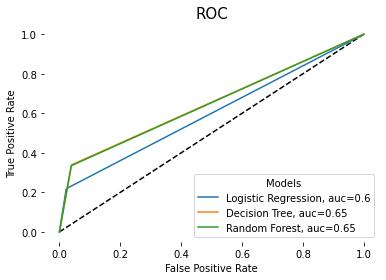

In [78]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Logistic Regression, auc="+str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="Decision Tree, auc="+str(round(auc2,2)))
plt.plot(fpr3,tpr3,label="Random Forest, auc="+str(round(auc3,2)))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)

In [3]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [22]:
import pickle
filename = 'credit.pkl'
pickle.dump(model, open(filename, 'wb'))